## Assignment 7 Submission

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import arviz as az
from scipy import stats

### Q1

Posterior distribution of $\boldsymbol \beta$

\begin{align*}
    p(\boldsymbol \beta | \textbf{y}, \textbf{X}, \Sigma,\boldsymbol\beta_0, \Sigma_\beta) &\propto{}  p(\textbf{y}_{n\times 1}| \textbf{X}_{n\times p}, \boldsymbol \beta, \Sigma) \times p(\boldsymbol \beta_{p \times 1})\\
    &={} (2\pi )^{-n/2}\det(\Sigma)^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \times (2\pi )^{-p/2}\det(\Sigma_\beta)^{-1/2}\, \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right)\\
    &\propto{} \exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \times  \exp \left(-{\frac {1}{2}}(\boldsymbol\beta - \boldsymbol\beta_0)^\top \Sigma_\beta^{-1}(\boldsymbol\beta - \boldsymbol\beta_0)\right)\\
    &\propto{} \exp \left(-{\frac {1}{2}}({\boldsymbol \beta^\top}\mathbf{X^\top}\Sigma^{-1} \mathbf{X\boldsymbol \beta} - 2{\boldsymbol \beta^\top}\mathbf{X^\top}\Sigma^{-1} \mathbf{y}) \right) \times \exp \left(-{\frac {1}{2}}(\boldsymbol\beta^\top \Sigma_\beta^{-1}\boldsymbol\beta - 2 \boldsymbol \beta^\top \Sigma_\beta^{-1} \boldsymbol\beta_0)\right) \\
    &= \exp \left(-{\frac {1}{2}}\left({\boldsymbol \beta^\top}\left(\mathbf{X^\top}\Sigma^{-1} \mathbf{X} + \Sigma_\beta^{-1} \right)\boldsymbol \beta - 2{\boldsymbol \beta^\top}\left(\mathbf{X^\top}\Sigma^{-1} \mathbf{y} + \Sigma_\beta^{-1} \boldsymbol\beta_0\right)\right)\right) \\
    &= \exp \left(-{\frac{1}{2}}\left({\boldsymbol \beta}-(\mathbf{X^\top}\Sigma^{-1}\mathbf{X} + \Sigma_\beta^{-1})^{-1}(\mathbf{X^\top}\Sigma^{-1}\mathbf{y}+\Sigma_\beta^{-1}\beta_0)\right)^\top\left(\mathbf{X^\top}\Sigma^{-1} \mathbf{X} + \Sigma_\beta^{-1} \right)\left({\boldsymbol \beta}-(\mathbf{X^\top}\Sigma^{-1}\mathbf{X} + \Sigma_\beta^{-1})^{-1}(\mathbf{X^\top}\Sigma^{-1}\mathbf{y}+\Sigma_\beta^{-1}\beta_0)\right)\right) \\

    &\sim \mathcal{MVN}\left(E[\boldsymbol \beta] = (\mathbf{X^\top}\Sigma^{-1}\mathbf{X} + \Sigma_\beta^{-1})^{-1}(\mathbf{X^\top}\Sigma^{-1}\mathbf{y}+\Sigma_\beta^{-1}\beta_0), \ COV[\boldsymbol \beta] = \left(\mathbf{X^\top}\Sigma^{-1} \mathbf{X} + \Sigma_\beta^{-1} \right)^{-1} \right)
\end{align*}

Posterior distribution of $\sigma^2$ with prior $p(\sigma^2|\alpha^*, \beta^*) = \frac{\beta^*}{\Gamma(\alpha^*)}(\sigma^2)^{-\alpha-1}\exp(-\frac{\beta^*}{\sigma^2})$.

\begin{align*}
    p(\sigma^2|\mathbf{y}, \mathbf{X}, \boldsymbol \beta, \alpha^*, \beta^*) &\propto p(\textbf{y}_{n\times 1}| \textbf{X}_{n\times p}, \boldsymbol \beta, \Sigma=\sigma^2I)p(\sigma^2|\alpha^*, \beta^*) \\
    &= (2\pi )^{-n/2}|\Sigma|^{-1/2}\,\exp \left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \times \frac{\beta^*}{\Gamma(\alpha^*)}(\sigma^2)^{-\alpha-1}\exp(-\frac{\beta^*}{\sigma^2}) \\
    &\propto |\Sigma|^{-\frac{1}{2}}\exp\left(-{\frac {1}{2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top \Sigma^{-1}(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right) \times \sigma^{2(-\alpha^*-1)}\exp\left(-\frac{\beta^*}{\sigma^2}\right) &\text{(Focusing the terms with $\sigma^2$ or $\Sigma$ only)} \\
    &= \sigma^{-\frac{n}{2}}\exp\left(-{\frac {1}{2\sigma^2}}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)  \times \sigma^{2(-\alpha^*-1)}\exp\left(-\frac{\beta^*}{\sigma^2}\right) \\
    &= (\sigma^2)^{-(\alpha^*+\frac{n}{2})-1} \exp\left(-\frac{\beta^* + (1/2)(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top(\mathbf {y} - \mathbf{X\boldsymbol\beta})}{\sigma^2}\right) \\
    &\sim \text{Inv-Gamma}\left(\alpha^*+\frac{n}{2}, \beta^* + \frac{1}{2}(\mathbf {y} -\mathbf{X\boldsymbol \beta})^\top(\mathbf {y} - \mathbf{X\boldsymbol\beta})\right)
\end{align*}

In Q2 and Q3, we will use the wine quality dataset from kaggle (https://www.kaggle.com/datasets/yasserh/wine-quality-dataset). Where we will predict the quality of the wine (score between 0 to 10), with various input variables about the properties of the wine.

### Q2

In [2]:
import pandas as pd
import pymc as pm

df = pd.read_csv("./../WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


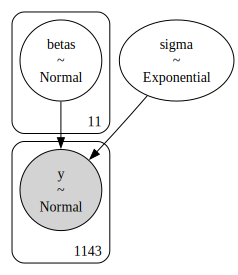

In [3]:
y = df["quality"].to_numpy() # output

df2 = df.drop(["quality", "Id"], axis = 1) # drop output and unnecessary columns out
X = df2.to_numpy() # matrix X (explanatory variable)
n, p = len(X), len(X[0])

with pm.Model() as bayes_linreg:
    betas = pm.Normal("betas", mu=0, sigma=1, shape=p)
    sigma = pm.Exponential("sigma", lam=2)
    y = pm.Normal("y", mu=X@betas, sigma=sigma, observed=y)
pm.model_to_graphviz(bayes_linreg)

In [4]:
with bayes_linreg:
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [betas, sigma]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


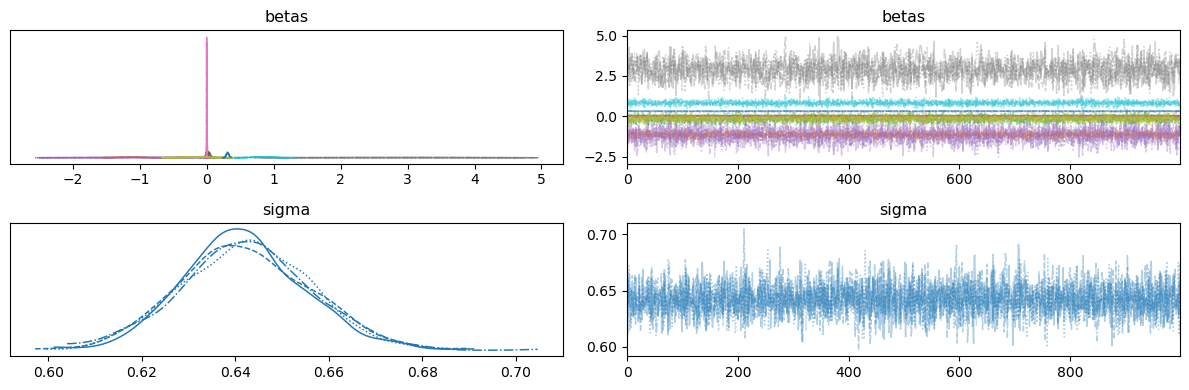

In [5]:
import arviz as az
import matplotlib.pyplot as plt

az.plot_trace(idata)
plt.tight_layout()

In [6]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.03239,0.01779,0.00067,0.06763,0.00035,0.00025,2525.92247,2508.52468,1.00050
betas[1],-1.14188,0.13950,-1.40405,-0.88913,0.00254,0.00180,3012.04733,2854.09685,1.00131
betas[2],-0.16398,0.16989,-0.49315,0.13999,0.00328,0.00233,2680.10790,2490.80525,1.00208
betas[3],0.00227,0.01444,-0.02594,0.02899,0.00021,0.00025,4590.01621,2870.92745,0.99985
betas[4],-1.16830,0.43831,-1.98116,-0.34931,0.00786,0.00556,3097.96986,3025.15931,1.00106
betas[5],0.00220,0.00259,-0.00271,0.00685,0.00005,0.00004,3119.69081,2767.36045,1.00107
betas[6],-0.00238,0.00084,-0.00398,-0.00086,0.00002,0.00001,2545.30088,2341.30916,1.00073
betas[7],2.88801,0.59665,1.82029,4.05190,0.01271,0.00911,2203.81918,2481.16854,1.00087
betas[8],-0.13354,0.15795,-0.42825,0.16386,0.00319,0.00240,2449.37782,2581.43830,1.00097
betas[9],0.82042,0.12736,0.58680,1.05695,0.00212,0.00150,3605.61157,2975.20846,1.00049


<Axes: >

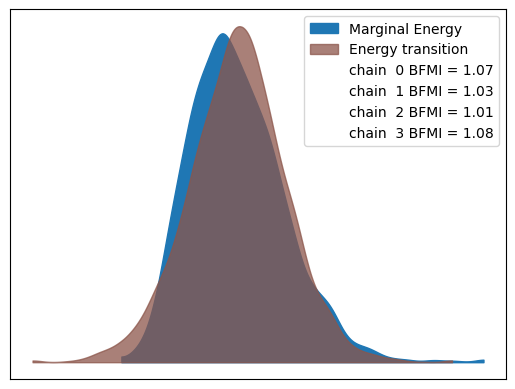

In [7]:
az.plot_energy(idata)

MCMC diagnostics: The sample drawn from the chains represent the data well as we have seen from the r_hat value, which is very close to 1, and the energy plot with almost aligned between two curves indicates that the sample agrees with each other between chain. From the regression perspective, there are some regression variables that are significant (i.e., $\beta_9$ has low s.d. and high ESS), and some are not (i.e., $\beta_3$ has high s.d. and low ESS).

### Q3

In [8]:
import numpy as np

y = df["quality"].to_numpy()
random_index = np.random.randint(low = 0, high = len(y), size = len(y)//10) # choose 10% of the data to be outliers
y[random_index] *= 5 # For this case, assuming that the quality index can be higher than 10

y[random_index]

array([30, 35, 25, 25, 25, 25, 25, 25, 30, 30, 30, 25, 15, 25, 25, 30, 30,
       30, 20, 30, 25, 25, 30, 30, 25, 30, 25, 20, 25, 25, 30, 25, 25, 30,
       25, 25, 35, 30, 25, 25, 30, 25, 25, 30, 25, 25, 25, 25, 25, 25, 30,
       25, 25, 25, 30, 30, 25, 25, 35, 25, 30, 35, 25, 20, 25, 25, 25, 25,
       30, 25, 25, 30, 25, 30, 25, 35, 30, 35, 35, 25, 35, 25, 25, 30, 15,
       25, 30, 25, 30, 25, 25, 30, 25, 25, 30, 35, 25, 30, 30, 25, 25, 25,
       25, 25, 30, 30, 25, 20, 25, 30, 25, 25, 25, 25], dtype=int64)

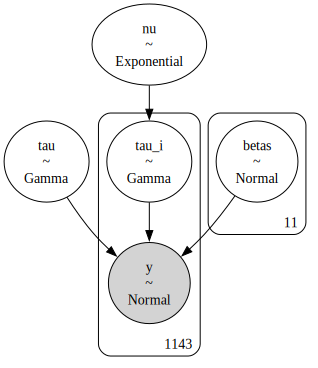

In [9]:
with pm.Model() as outliers_reg:
    nu = pm.Exponential("nu", lam = 2)
    tau_i = pm.Gamma("tau_i", alpha = nu/2, beta = nu/2, shape = n)

    betas = pm.Normal("betas", mu = 0, sigma = 1, shape = p)
    tau = pm.Gamma("tau", alpha = 2, beta = 2)

    y = pm.Normal("y", mu = X@betas, tau = tau*tau_i, observed = y)
pm.model_to_graphviz(outliers_reg)

In [10]:
with outliers_reg:
    idata = pm.sample()

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [nu, tau_i, betas, tau]


Output()

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 168 seconds.


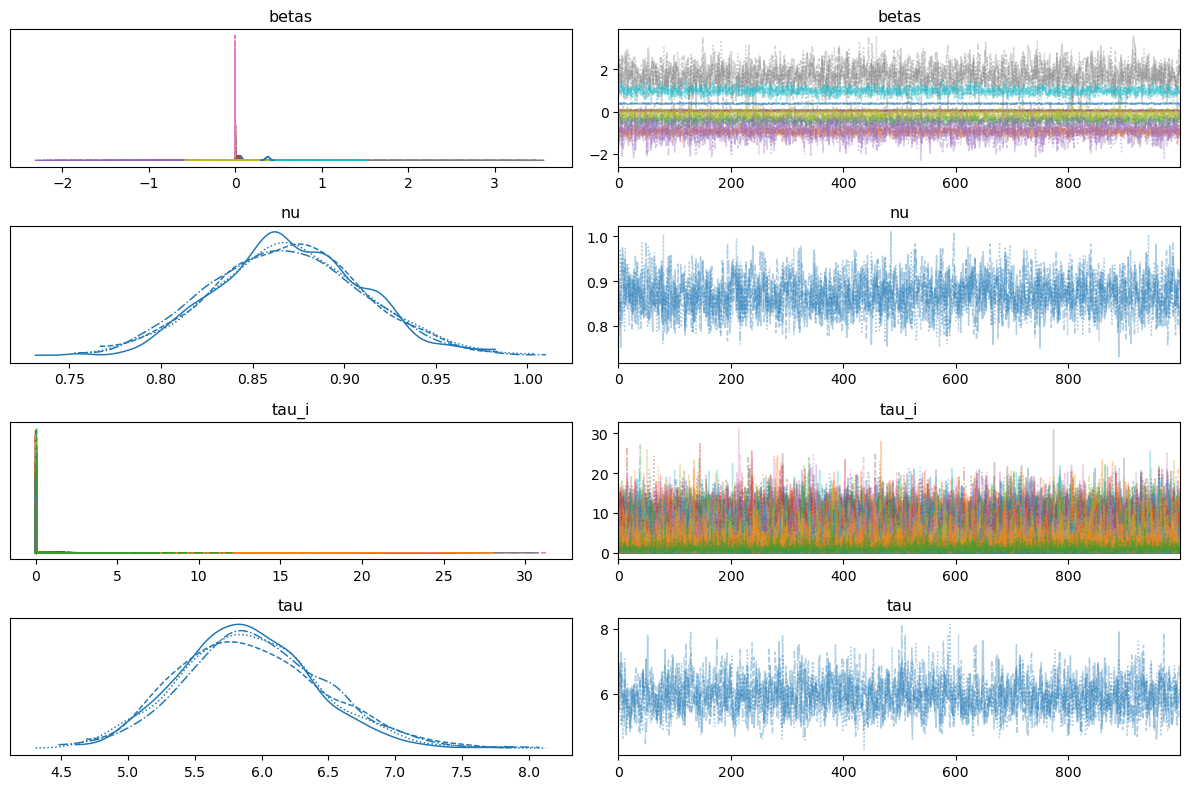

In [11]:
az.plot_trace(idata)
plt.tight_layout()

In [12]:
az.summary(idata, round_to=5)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
betas[0],0.05817,0.01868,0.02304,0.09355,0.00039,0.00027,2338.54289,2483.94702,1.00130
betas[1],-0.95252,0.14006,-1.19935,-0.67357,0.00283,0.00202,2470.56482,2549.42822,0.99981
betas[2],-0.38893,0.16552,-0.70354,-0.07690,0.00339,0.00245,2392.53155,2366.97361,1.00220
betas[3],0.03110,0.01650,-0.00067,0.06045,0.00035,0.00025,2210.75187,2922.82946,1.00006
betas[4],-0.85834,0.43151,-1.65018,-0.01469,0.00898,0.00635,2313.81278,2621.36975,1.00079
...,...,...,...,...,...,...,...,...,...
tau_i[1139],0.58218,0.60548,0.00019,1.66584,0.00763,0.00655,4776.60693,2151.81235,1.00073
tau_i[1140],0.87442,0.90576,0.00024,2.59764,0.01167,0.00978,3826.80009,1714.17705,1.00087
tau_i[1141],2.09108,2.15584,0.00006,5.84505,0.02655,0.02315,4353.56063,1883.74801,1.00048
tau_i[1142],1.03770,1.09033,0.00009,2.99065,0.01417,0.01174,3325.41344,1965.82685,1.00078


<Axes: >

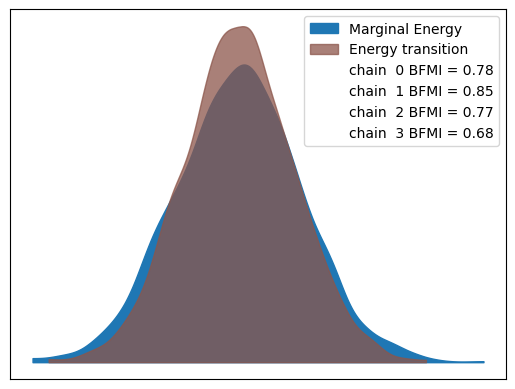

In [13]:
az.plot_energy(idata)

From the energy plot, the impact of the outliers make some samples disagree with each other between chain, but overall the MCMC sampling for this model is still produce decent result. Next, we will try to detect the outliers data by observing the value of $\tau_i$.

Using posterior distribution of $\tau_i$ to identify outliers by detecting the lowest 10% percentile of $\tau_i$ (which means high variance and may indicates outliers), for $i=0,1,\cdots,1142$.

In [14]:
tau_i_post = idata.posterior["tau_i"].mean(dim = ["chain", "draw"])
outliers_idx = np.argsort(tau_i_post)[:n//10]

"""
    Find the indices that are not presented in both of the list (the predicted outliers --> outliers_idx, the true outliers --> random_index)

"""
outliers_idx = set(outliers_idx.values) 
random_index_set = set(random_index)
error = outliers_idx.union(random_index_set) - outliers_idx.intersection(random_index_set)
print(f"Out of {n} observations, the wrongly predicted indices are: {error}")
print(f"The percentage of error = {len(error)*100/n}%")

Out of 1143 observations, the wrongly predicted indices are: {904, 462}
The percentage of error = 0.17497812773403323%


Detecting influential point through the posterior distribution of $\sigma_i^{-2} = \tau \times \tau_i$.

In [15]:
tau_post = idata.posterior["tau"].mean(dim = ["chain", "draw"])
sigma2_post = 1/(tau_post.values * tau_i_post.values)

D = np.diag(sigma2_post) # diagonal matrix
H = X @ np.linalg.inv(X.T @ D @ X) @ X.T
diag_entries = np.diag(H)

print(f"Influence of non-outlier = {diag_entries[0]}")
print(f"Influence of outlier {diag_entries[random_index[1]]}")
print(f"Ratio = {diag_entries[random_index[0]]/diag_entries[0]}")

Influence of non-outlier = 0.00021074011475375853
Influence of outlier 0.00021767510683601792
Ratio = 1.3054418157123784


We can see that the **influence** of the outlier is much higher than the **influence** of the non-outliers data.